# CLASSFICATION  and REGRESSION USING DECISION TREE

## Idea of Decision trees

Idea of Decision Tree (hereafter DT) algorithm is to learn a set of if/else questions that can lead to decision. Here is a very naive example of classifying a person. If he/she claps a blog post after reading, then the person is considered as awesome, else, little less awesome. This tree is based on yes/no question. But the idea would remain same even for the numeric data. A decision tree can combine both numeric and categorical data.

![here](https://miro.medium.com/max/1000/1*3MBixNIgYtJtdtjFFcn8Jg.png)


## Terminology in Decision Trees

![here](https://miro.medium.com/max/500/1*TUHOwi2E25IJiR1_vXDaXw.png)


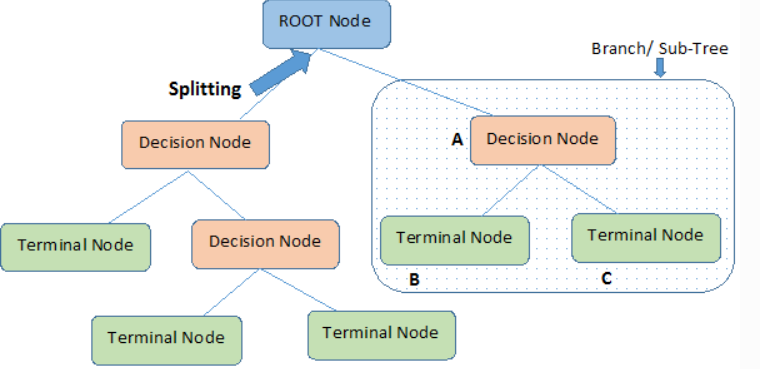

Before diving into let’s look at the basic terminology used with decision trees:

1. **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

2. **Splitting**: It is a process of dividing a node into two or more sub-nodes.

3. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.

4. **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal node.

5. **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

6. **Branch / Sub-Tree**: A sub section of entire tree is called branch or sub-tree.

7. **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

### Pros
1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns.
3. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
4. It can be used for feature engineering such as predicting missing values, suitable for variable selection.

### CONS

1. Sensitive to noisy data. It can overfit noisy data.
2. The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.

In [232]:
import pandas as pd
import numpy as np
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['pregnancies', 'glucose', 'BP', 'skin-thick', 'insulin', 'BMI', 'pedi', 'age', 'class']
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [233]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [234]:
# To numpy for fast computation
array = df.values
X = array[:,0:8] #independent features
Y = array[:,8] # dependent features

## For Feature selection Using Filter Methods



what are filter methods ?

![text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)
Filter methods select features from a dataset independently for any machine learning algorithm.
These methods rely only on the characteristics of these variables, so features are filtered out of 
the data before learning begins.These methods are powerful and simple and help to quickly 
remove features— and they are generally the first step in any feature selection pipeline.

Ex :- Chi-squared Test, ANOVA-F test, Pearson Correlation

### We'll be using ----> CHI-SQUARED test

In [235]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [236]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4) # we want to select top 4 features
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


### Those with highest Scores Have Been choosen

So We'll Choose  

Plas,Test,Mass and Age  as our **top4** features

#### Now our Dataset Looks like below :-

In [237]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:]) # Top 5 Rows of Dataset after Chi-squared Test

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [238]:
features.shape

(768, 4)

In [239]:
print(features.shape) # Our new Independent variables
print(Y.shape) # Our dependent variables

(768, 4)
(768,)


In [240]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [241]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building our decision tree

In [242]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [243]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


#### Model accuracy is 71 percent with 4 features but it drops to 69.6 percent for all features
#### So feature selection is important all the times

## Building our decision tree regressor model

In [244]:
df=pd.read_csv('insurance.csv')

In [245]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [246]:
encoded_data = pd.get_dummies(df, columns=["sex","smoker","region"])
encoded_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [248]:
# # To numpy for fast computation
Y = encoded_data['charges'].to_numpy()
X=encoded_data.drop(['charges'],axis=1).to_numpy()

In [249]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [250]:
from sklearn.tree import DecisionTreeRegressor

DTregr=DecisionTreeRegressor()
DTregr=DTregr.fit(X_train,y_train)

y_pred=DTregr.predict(X_test)

### Evaluating our Model

In [251]:
from sklearn.metrics import r2_score 

Rsquared = r2_score(y_test, y_pred) 

print("R SQUARED ERROR IS ",Rsquared)

R SQUARED ERROR IS  0.7349915086385412


### Feature selection for Regression

In [252]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE

In [253]:
df=pd.read_csv('insurance.csv')
encoded_data = pd.get_dummies(df, columns=["sex","smoker","region"])
# # To numpy for fast computation
Y = encoded_data['charges'].to_numpy()
X=encoded_data.drop(['charges'],axis=1).to_numpy()

In [254]:
from sklearn.tree import DecisionTreeRegressor

DTregr1=DecisionTreeRegressor()

rfe = RFE(estimator=DTregr1,n_features_to_select= 8)
fit = rfe.fit(X, Y)

In [256]:
features = fit.transform(X)
features[:,:8]

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  1.  ,  0.  ]])

In [257]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [259]:

DTregr1=DTregr1.fit(X_train,y_train)

y_pred=DTregr1.predict(X_test)

In [260]:
from sklearn.metrics import r2_score 

Rsquared = r2_score(y_test, y_pred) 

print("R SQUARED ERROR IS ",Rsquared)

R SQUARED ERROR IS  0.7412681981282936


### hey That's Improvement